In [ ]:
!pip install researchpy
!pip install bioinfokit
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.1/88.1 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for bioinfokit: filename=bioinfokit-2.1.4-py3-none-any.whl size=59221 sha256=b92d3b028261c105cd315c20c0e2f75539af7b36acd96f70fa17953294cdabcc
  Stored in directory: /root/.cache/pip/wheels/45/b1/91/212510cab723ee76a25180836e8897f926820382374184b017
Successfully built bioinfokit


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
import researchpy as rp
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from scipy import stats as st
from bioinfokit.analys import get_data

from sklearn.metrics import hamming_loss
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import matthews_corrcoef

In [ ]:
import os
os.environ['KAGGLE_USERNAME']='hrpasr'
os.environ['KAGGLE_KEY']='da2f5904024b31ea0cd725245f22d1aa'

In [ ]:
#download dataset
! kaggle datasets download -d gauravduttakiit/smoker-status-prediction

Dataset URL: https://www.kaggle.com/datasets/gauravduttakiit/smoker-status-prediction
License(s): CC0-1.0
  0% 0.00/1.30M [00:00<?, ?B/s]
100% 1.30M/1.30M [00:00<00:00, 136MB/s]


In [ ]:
#unzip file
! unzip /content/smoker-status-prediction.zip

Archive:  /content/smoker-status-prediction.zip
  inflating: test_dataset.csv        
  inflating: train_dataset.csv       


In [ ]:
df=pd.read_csv('/content/train_dataset.csv')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows',None)

In [ ]:
df = df.sample(frac = 1)  #Shuffle the rows

In [ ]:
df.shape

(38984, 23)

In [ ]:
df

In [ ]:
df.isna().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

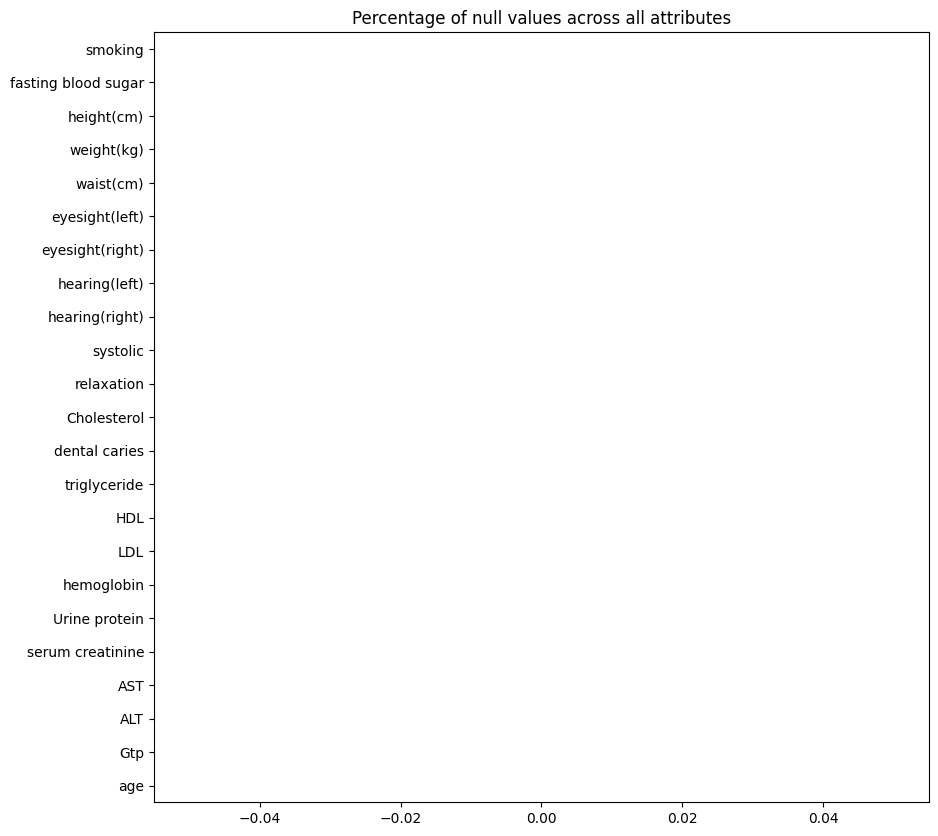

In [ ]:
plt.figure(figsize=(10,10))
np.round(df.isnull().sum()/df.shape[0]*100).sort_values().plot(kind='barh')
plt.title("Percentage of null values across all attributes")
plt.savefig("Percentage of null values in the dataset", dpi=800,bbox_inches = 'tight')

In [ ]:
#fillling empty values with median
df = df.fillna(df.median())
df.isna().sum()

age                    0
height(cm)             0
weight(kg)             0
waist(cm)              0
eyesight(left)         0
eyesight(right)        0
hearing(left)          0
hearing(right)         0
systolic               0
relaxation             0
fasting blood sugar    0
Cholesterol            0
triglyceride           0
HDL                    0
LDL                    0
hemoglobin             0
Urine protein          0
serum creatinine       0
AST                    0
ALT                    0
Gtp                    0
dental caries          0
smoking                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38984 entries, 25500 to 23912
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  38984 non-null  float64
 1   height(cm)           38984 non-null  float64
 2   weight(kg)           38984 non-null  float64
 3   waist(cm)            38984 non-null  float64
 4   eyesight(left)       38984 non-null  float64
 5   eyesight(right)      38984 non-null  float64
 6   hearing(left)        38984 non-null  float64
 7   hearing(right)       38984 non-null  float64
 8   systolic             38984 non-null  float64
 9   relaxation           38984 non-null  float64
 10  fasting blood sugar  38984 non-null  float64
 11  Cholesterol          38984 non-null  float64
 12  triglyceride         38984 non-null  float64
 13  HDL                  38984 non-null  float64
 14  LDL                  38984 non-null  float64
 15  hemoglobin           38984 non-null  

In [ ]:
df.describe()

age    height(cm)    weight(kg)     waist(cm)  eyesight(left)  \
count  38984.000000  38984.000000  38984.000000  38984.000000    38984.000000   
mean       0.519148      0.866787      0.488435      0.636140        0.102521   
std        0.141924      0.048355      0.095530      0.072301        0.050356   
min        0.235294      0.684211      0.222222      0.395349        0.010101   
25%        0.470588      0.842105      0.407407      0.589147        0.080808   
50%        0.470588      0.868421      0.481481      0.635659        0.101010   
75%        0.647059      0.894737      0.555556      0.682171        0.121212   
max        1.000000      1.000000      1.000000      1.000000        1.000000   

       eyesight(right)  hearing(left)  hearing(right)      systolic  \
count     38984.000000   38984.000000    38984.000000  38984.000000   
mean          0.101896       0.512685        0.513095      0.521355   
std           0.049880       0.078623        0.079851      0.058556   
min           0.010101       0.500000        0.500000      0.304721   
25%           0.080808       0.500000        0.500000      0.480687   
50%           0.101010       0.500000        0.500000      0.515021   
75%           0.121212       0.500000        0.500000      0.557940   
max           1.000000       1.000000        1.000000      1.000000   

         relaxation  fasting blood sugar   Cholesterol  triglyceride  \
count  38984.000000         38984.000000  38984.000000  38984.000000   
mean       0.520510             0.234852      0.442435      0.126876   
std        0.066156             0.048801      0.081694      0.071875   
min        0.273973             0.108747      0.123596      0.008008   
25%        0.479452             0.210402      0.386517      0.074074   
50%        0.520548             0.226950      0.438202      0.108108   
75%        0.561644             0.245863      0.492135      0.160160   
max        1.000000             1.000000      1.000000      1.000000   

                HDL           LDL    hemoglobin  Urine protein  \
count  38984.000000  38984.000000  38984.000000   38984.000000   
mean       0.159591      0.061872      0.693093       0.181087   
std        0.040718      0.023055      0.074243       0.067018   
min        0.011142      0.000538      0.232227       0.166667   
25%        0.130919      0.048925      0.644550       0.166667   
50%        0.153203      0.060753      0.701422       0.166667   
75%        0.183844      0.073118      0.748815       0.166667   
max        1.000000      1.000000      1.000000       1.000000   

       serum creatinine           AST           ALT           Gtp  \
count      38984.000000  38984.000000  38984.000000  38984.000000   
mean           0.076382      0.024035      0.009315      0.039945   
std            0.019019      0.017592      0.010745      0.049744   
min            0.008621      0.005505      0.000343      0.002002   
25%            0.068966      0.017431      0.005148      0.017017   
50%            0.077586      0.021101      0.007207      0.026026   
75%            0.086207      0.026606      0.010638      0.044044   
max            1.000000      1.000000      1.000000      1.000000   

       dental caries       smoking  
count   38984.000000  38984.000000  
mean        0.214421      0.367279  
std         0.410426      0.482070  
min         0.000000      0.000000  
25%         0.000000      0.000000  
50%         0.000000      0.000000  
75%         0.000000      1.000000  
max         1.000000      1.000000

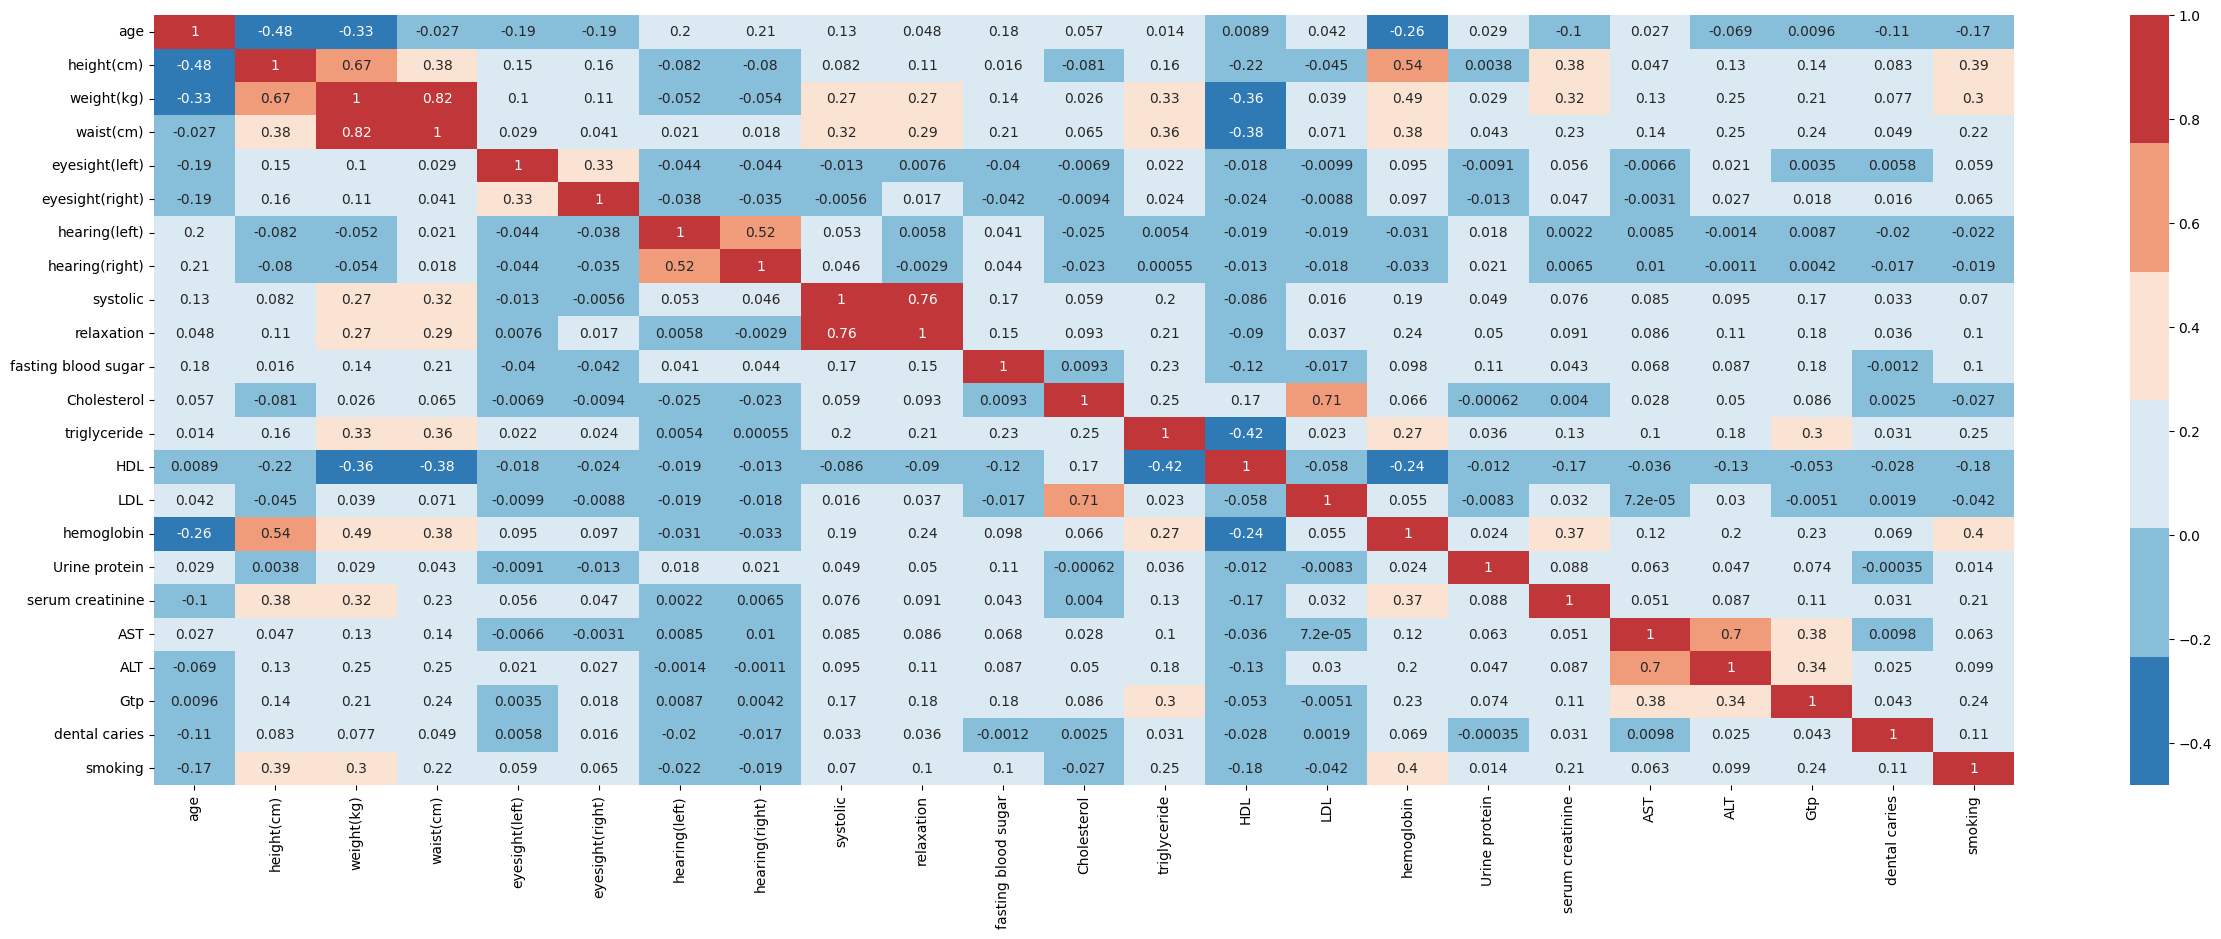

In [ ]:
#Pearsons Co-relation
df = df.astype('float64')
import seaborn as sns
corr=df.corr()
plt.figure(figsize=(30,10))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap=sns.color_palette('RdBu_r'),
            annot=True)
plt.savefig("Pearson.png",dpi=600,bbox_inches = 'tight')
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(corr["smoking"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.0001 ]
relevant_features.sort_values(ascending=False)

smoking                1.000000
hemoglobin             0.401206
height(cm)             0.394314
weight(kg)             0.299347
triglyceride           0.251057
Gtp                    0.240274
waist(cm)              0.223359
serum creatinine       0.212473
HDL                    0.179509
age                    0.166268
dental caries          0.107601
relaxation             0.103663
fasting blood sugar    0.099908
ALT                    0.098615
systolic               0.070176
eyesight(right)        0.064587
AST                    0.062834
eyesight(left)         0.059409
LDL                    0.041627
Cholesterol            0.027493
hearing(left)          0.022077
hearing(right)         0.018990
Urine protein          0.013653
Name: smoking, dtype: float64

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# copy the data
df_max_scaled = df.copy()

# apply normalization techniques
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()

# view normalized data
display(df_max_scaled)

In [ ]:
df=df_max_scaled

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

# Load dataset
df = df.astype('float64')

# Assuming the target variable is in the "target" column and the features are in other columns
x = df.drop('smoking', axis=1)
y = df['smoking']

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Define cross-validation strategy (e.g., 5-fold cross-validation)
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_classifier, x, y, cv=kf)

# Print cross-validation scores
print("Cross-validation scores:", cv_scores)

# Calculate and print mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean cross-validation score:", mean_cv_score)


Cross-validation scores: [0.80661708 0.81687612 0.8181585  0.80276994 0.80118009 0.80194972
 0.80528476 0.80861981 0.80861981 0.80990251]
Mean cross-validation score: 0.8079978342317451


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

# Assuming 'df' is your DataFrame containing the data

# Step 1: Create a balanced dataset with 500 positive and 500 negative samples
positive_class = df[df['smoking'] == 1.0].sample(n=1000, random_state=42)
negative_class = df[df['smoking'] == 0.0].sample(n=1000, random_state=42)
balanced_df = pd.concat([positive_class, negative_class])

# Shuffle the balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Step 2: Perform train-test split on the balanced dataset
x = balanced_df.drop('smoking', axis=1)
y = balanced_df['smoking']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Step 3: Determine mutual information on the training set
mutual_info = mutual_info_classif(x_train, y_train)
mutual_info = pd.Series(mutual_info, index=x_train.columns)
mutual_info = mutual_info.sort_values(ascending=False)

# Print sorted mutual information
print(mutual_info)

# Print the counts of the balanced dataset
print(balanced_df['smoking'].value_counts())


height(cm)             0.137304
hemoglobin             0.111921
Gtp                    0.070486
weight(kg)             0.064980
serum creatinine       0.053124
triglyceride           0.044106
waist(cm)              0.041649
eyesight(right)        0.022824
relaxation             0.020144
hearing(left)          0.019341
dental caries          0.019189
Urine protein          0.018064
hearing(right)         0.015680
systolic               0.009680
HDL                    0.009571
age                    0.006623
eyesight(left)         0.004211
LDL                    0.000000
fasting blood sugar    0.000000
AST                    0.000000
ALT                    0.000000
Cholesterol            0.000000
dtype: float64
smoking
0.0    1000
1.0    1000
Name: count, dtype: int64


In [ ]:
# # from imblearn.over_sampling import BorderlineSMOTE
# # df = df.astype('float64')

# # x = df.drop('smoking', axis=1)
# # y = df['smoking']

# # x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)
# from sklearn.model_selection import train_test_split

# # Assuming `data` is your original DataFrame with 38,000 samples
# # and `target` is the name of your column with binary classification (e.g., 1 for positive, 0 for negative)

# # Stratify the data and set test_size to get approximately 1,000 samples
# sample_data, _ = train_test_split(df, test_size=(1 - 1000/38984), stratify=df['smoking'])

# # Verify the distribution in the sample
# print(sample_data['smoking'].value_counts())


In [ ]:
#Mutual Information
from sklearn.feature_selection import mutual_info_classif
#Determine mutual informatiom
mutual_info=mutual_info_classif(x_train,y_train)
mutual_info

mutual_info=pd.Series(mutual_info)
mutual_info.index=x_train.columns
mutual_info.sort_values(ascending=False)

hemoglobin             0.139623
height(cm)             0.127961
Gtp                    0.082124
weight(kg)             0.048394
serum creatinine       0.048249
waist(cm)              0.047129
ALT                    0.033974
triglyceride           0.028637
Cholesterol            0.028466
relaxation             0.027334
HDL                    0.023228
hearing(right)         0.019516
AST                    0.015382
dental caries          0.013386
age                    0.009069
eyesight(left)         0.008521
systolic               0.006935
fasting blood sugar    0.005890
hearing(left)          0.003336
Urine protein          0.002973
LDL                    0.000000
eyesight(right)        0.000000
dtype: float64

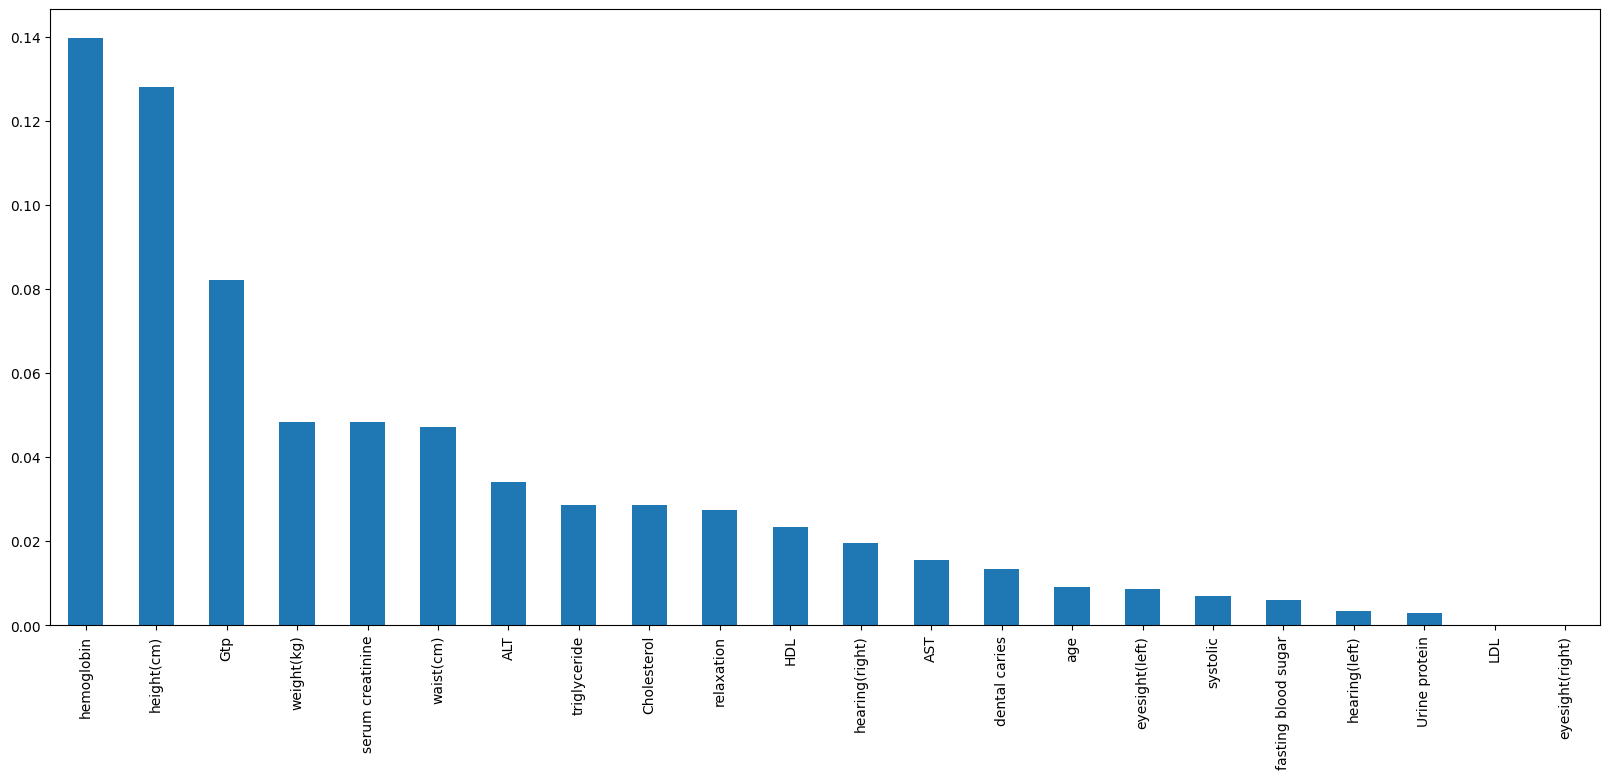

In [ ]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))
plt.savefig("MutualInformation.png", dpi=600,bbox_inches = 'tight')

In [ ]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 2.7 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from skopt import BayesSearchCV # Import BayesSearchCV
rf = RandomForestClassifier()


param_space = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

rfclassifier = opt = BayesSearchCV(
    RandomForestClassifier(),
    param_space,
    n_iter=30,  # Number of iterations/evaluations
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)

rfclassifier.fit(x_train, y_train)
rfclassifier.best_params_

OrderedDict([('bootstrap', True),
             ('max_depth', 110),
             ('max_features', 3),
             ('min_samples_leaf', 3),
             ('min_samples_split', 12),
             ('n_estimators', 100)])

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score
from sklearn.metrics import classification_report, average_precision_score, accuracy_score, f1_score
y_pred = rfclassifier.predict(x_test)
y_proba = rfclassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[128  69]
 [ 22 181]]
              precision    recall  f1-score   support

         0.0       0.85      0.65      0.74       197
         1.0       0.72      0.89      0.80       203

    accuracy                           0.77       400
   macro avg       0.79      0.77      0.77       400
weighted avg       0.79      0.77      0.77       400





accuracy 0.77
precision 0.72
recall 0.89
AUC: 0.84
Precision-Recall: 0.8


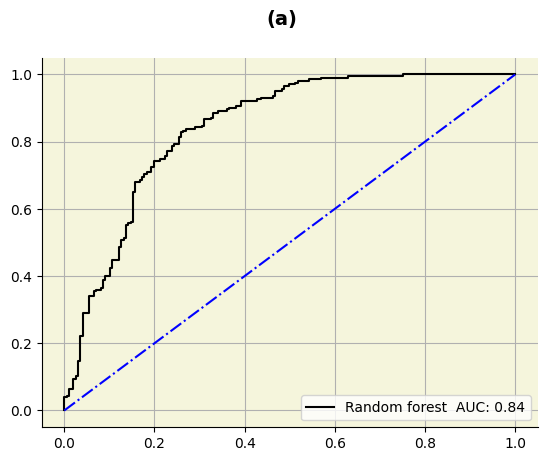

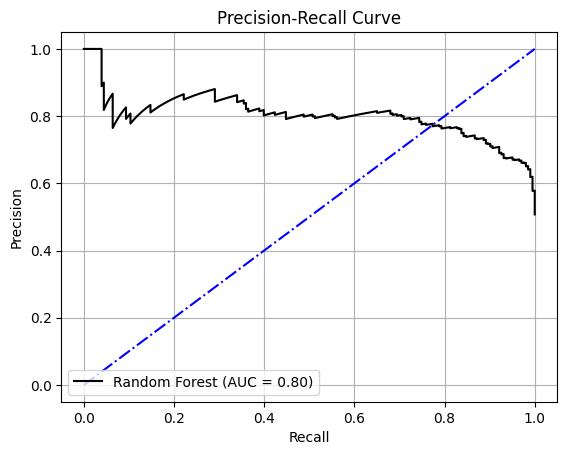

hamming loss
0.2275
jaccord score
0.6654411764705882
log loss
8.199931146024152
mathews correlation coefficient
0.5590634944839551


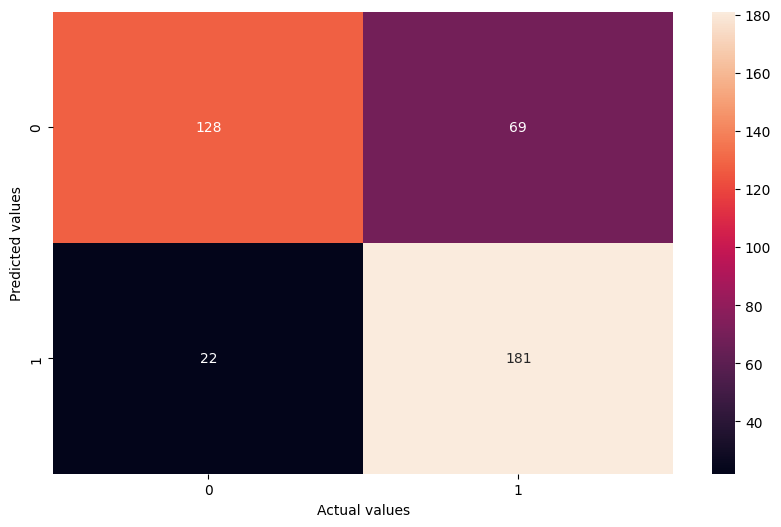

In [ ]:
# RandomForest summary
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Random forest  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC RandomForest", dpi=800,bbox_inches = 'tight')

plt.show()

#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.utils import Bunch
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import auc

# Calculate precision and recall
y_scores = rfclassifier.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC)
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='black', label=f'Random Forest (AUC = {auc_score:.2f})')

# Customize the plot
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)

# Save the plot
plt.savefig("PR_curve_random_forest.png", dpi=800, bbox_inches='tight')
plt.show()

#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Random forest", dpi=800,bbox_inches = 'tight')



print("hamming loss")
print(hamming_loss(y_test, y_pred))
print("jaccord score")
print(jaccard_score(y_test, y_pred))
print("log loss")
print(log_loss(y_test,y_pred))
print("mathews correlation coefficient")
print(matthews_corrcoef(y_test, y_pred))


In [ ]:
import shap
explainer = shap.Explainer(rfclassifier.predict, x_train)
shap_values = explainer(x_train)

PermutationExplainer explainer: 1601it [12:32,  2.10it/s]


In [ ]:
import shap

print("SHAP version:", shap.__version__)



SHAP version: 0.46.0


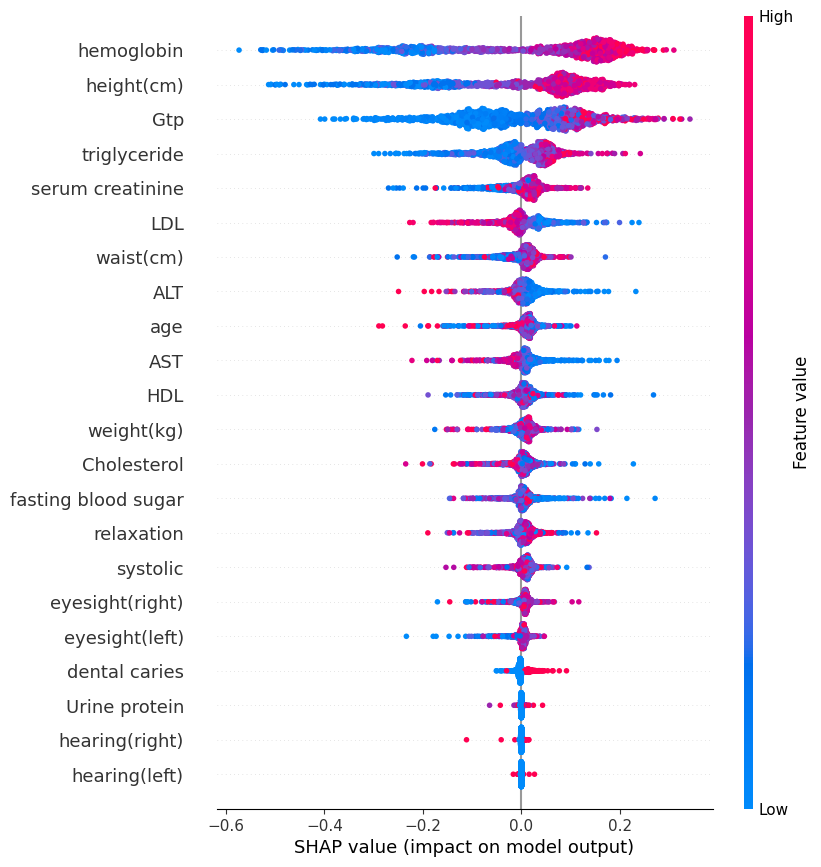

In [ ]:
fig=plt.figure()
fig=shap.plots.beeswarm(shap_values, max_display=25,show=False)
plt.savefig("BeeSwarm1.png", dpi=700,bbox_inches = 'tight')
plt.show()

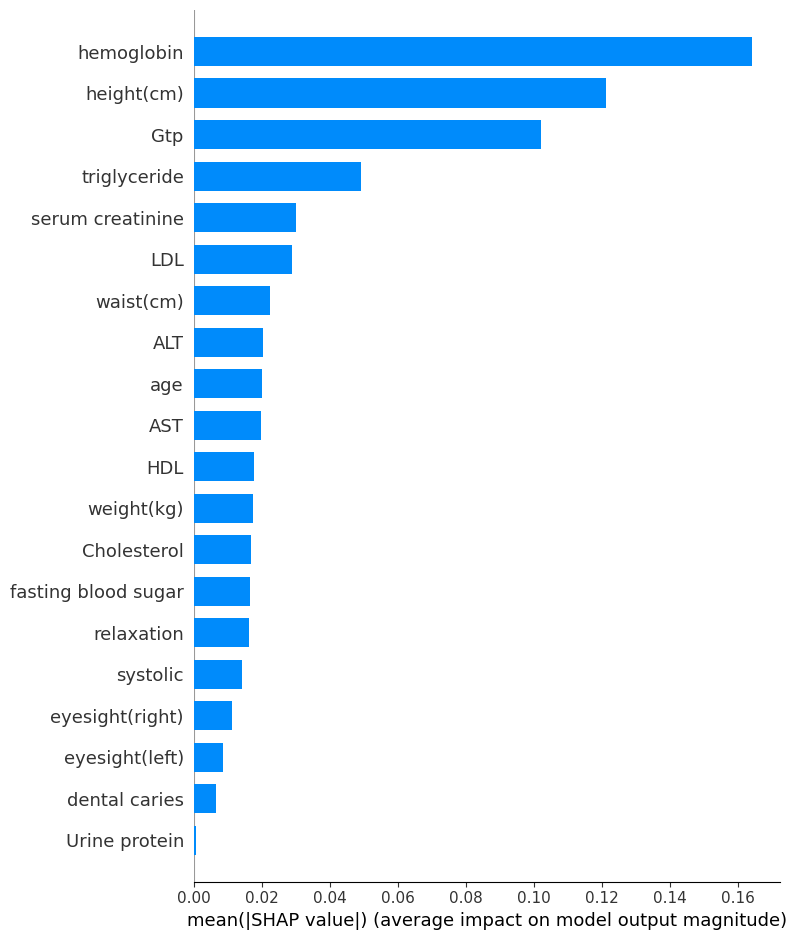

In [ ]:

# Average feature contribution


fig=shap.summary_plot(shap_values, x_train, plot_type="bar",show=False)
plt.savefig("BarChartSHAP.png", dpi=100,bbox_inches = 'tight')
plt.show()

In [ ]:
classifier_dtc = DecisionTreeClassifier()
classifier_dtc.fit(x_train,y_train)
y_pred=classifier_dtc.predict(x_test)

In [ ]:
explainer = shap.TreeExplainer(classifier_dtc)
shap_values = explainer.shap_values(x_train)
a=shap.force_plot(explainer.expected_value[0], shap_values[0])
shap.save_html('sample2.htm',a)

In [ ]:
#Logistic Regression
# Create the parameter grid based on the results of random search
param_grid = {
    'penalty': ['l2'],
    'C': [0.001,0.01,0.1,1,10,100,1000]
}

# Create a based model
lr = LogisticRegression()
# Instantiate the grid search model
lrClassifier = BayesSearchCV(
    lr,
    param_grid,
    n_iter=30,  # Number of iterations/evaluations
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)

lrClassifier.fit(x_train, y_train)
lrClassifier.best_params_


OrderedDict([('C', 100), ('penalty', 'l2')])

[[131  66]
 [ 34 169]]
              precision    recall  f1-score   support

         0.0       0.79      0.66      0.72       197
         1.0       0.72      0.83      0.77       203

    accuracy                           0.75       400
   macro avg       0.76      0.75      0.75       400
weighted avg       0.76      0.75      0.75       400

hamming loss
0.25
jaccord score
0.6282527881040892
log loss
9.010913347279288
mathews correlation coefficient
0.5052274146410498


accuracy 0.75
precision 0.72
recall 0.83
AUC: 0.81
Precision-Recall: 0.76


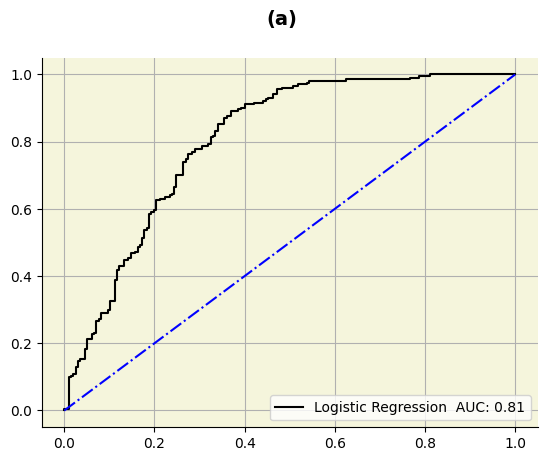

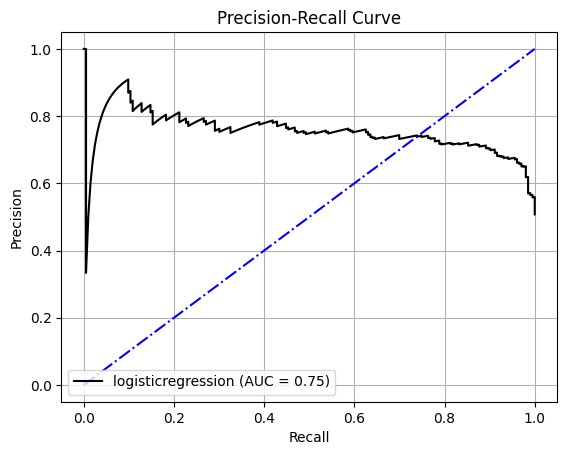

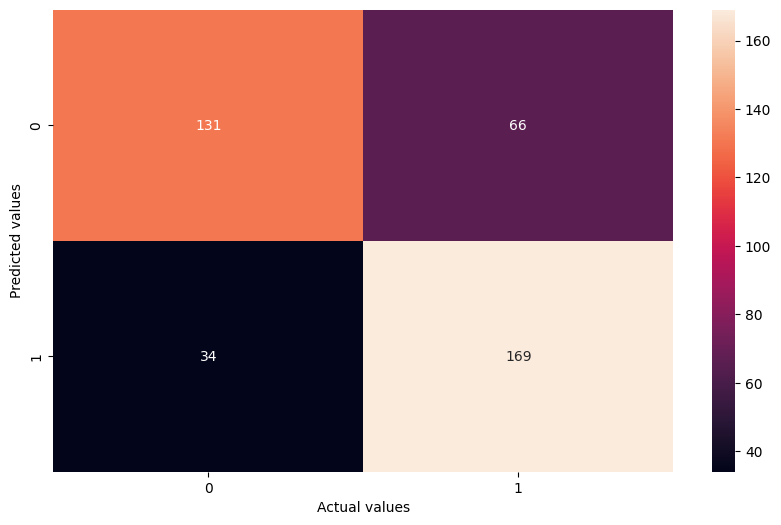

In [ ]:
y_pred = lrClassifier.predict(x_test)
y_proba = lrClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print("hamming loss")
print(hamming_loss(y_test, y_pred))
print("jaccord score")
print(jaccard_score(y_test, y_pred))
print("log loss")
print(log_loss(y_test,y_pred))
print("mathews correlation coefficient")
print(matthews_corrcoef(y_test, y_pred))

# RandomForest summary
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Logistic Regression  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC RandomForest", dpi=800,bbox_inches = 'tight')

plt.show()


#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.utils import Bunch
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import auc

# Calculate precision and recall
y_scores = lrClassifier.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC)
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='black', label=f'logisticregression (AUC = {auc_score:.2f})')

# Customize the plot
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)

# Save the plot
plt.savefig("PR_curve_logisticregression.png", dpi=800, bbox_inches='tight')
plt.show()


#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matrix Logistic regression", dpi=800,bbox_inches = 'tight')


In [ ]:
classifier_dtc = DecisionTreeClassifier()
classifier_dtc.fit(x_train,y_train)
y_pred=classifier_dtc.predict(x_test)

In [ ]:
!pip install --upgrade eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 4.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107721 sha256=41c616acc8907b4df9f6fcd0e34ed56ae65e5bf5534d81b36e88137fadde26c5
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
import eli5
print("Eli5 version:", eli5.__version__)


ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/metaestimators.py)

In [ ]:
!pip uninstall -y eli5

In [ ]:
!pip install "eli5<0.11"

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.8/105.8 kB 2.2 MB/s eta 0:00:00


In [ ]:
!pip install "scikit-learn<1.0" eli5

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 25.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
#ELI5
import eli5 as eli
eli.explain_weights(classifier_dtc)

ImportError: cannot import name 'if_delegate_has_method' from 'sklearn.utils.metaestimators' (/usr/local/lib/python3.10/dist-packages/sklearn/utils/metaestimators.py)

In [ ]:
eli.explain_prediction(classifier_dtc , np.array(x_test)[1])

NameError: name 'eli' is not defined

In [ ]:
eli.show_prediction(classifier_dtc, x_test.iloc[1],
                    feature_names=list(x_train.columns),
                    show_feature_values=True)

NameError: name 'eli' is not defined

In [ ]:
# from skopt import BayesSearchCV
# from sklearn.tree import DecisionTreeClassifier

# # Define the parameter grid
# param_grid = {
#     'criterion': ['gini', 'entropy'],
#     'max_depth': (4, 150),  # Use ranges for continuous/discrete values
#     'min_samples_split': (10, 500),
#     'splitter': ['best', 'random'],
#     'min_samples_leaf': (1, 11),
#     'max_features': ['log2', 'sqrt', None] # Remove 'auto' and replace it with None
# }

# # Initialize the model
# dt = DecisionTreeClassifier()

# # Instantiate BayesSearchCV
# bayes_search = BayesSearchCV(
#     estimator=dt,
#     search_spaces=param_grid,
#     n_iter=50,  # Number of parameter settings to sample
#     cv=3,
#     n_jobs=-1,
#     verbose=2
# )

# # Fit the model
# bayes_search.fit(x_train, y_train)
# dtClassifier = bayes_search.best_estimator_

# # Best parameters
# print(bayes_search.best_params_)
# # Best parameters
# bayes_search.best_params_
from skopt import BayesSearchCV
from skopt.space import Real, Integer, Categorical
from sklearn.tree import DecisionTreeClassifier

# Define parameter grid for BayesSearchCV
param_grid = {
    'criterion': Categorical(['gini', 'entropy']),
    'max_depth': Integer(4, 150),
    'min_samples_split': Integer(10, 500),
    'splitter': Categorical(['best', 'random']),
    'min_samples_leaf': Integer(1, 11),
    'max_features': Categorical(['log2', 'sqrt', None])  # Removed 'auto'
}

# Create a base model
dt = DecisionTreeClassifier()

# Instantiate BayesSearchCV
dt_classifier = BayesSearchCV(
    estimator=dt,
    search_spaces=param_grid,
    n_iter=50,  # Number of iterations for Bayesian optimization
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all available processors
    verbose=2
)

# Fit the model
dt_classifier.fit(x_train, y_train)

# Get the best parameters
best_params = dt_classifier.best_params_
print("Best Parameters:", best_params)



Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

[[124  73]
 [ 32 171]]
              precision    recall  f1-score   support

         0.0       0.79      0.63      0.70       197
         1.0       0.70      0.84      0.77       203

    accuracy                           0.74       400
   macro avg       0.75      0.74      0.73       400
weighted avg       0.75      0.74      0.73       400

hamming loss
0.2625
jaccord score
0.6195652173913043
log loss
0.8643461324892603
mathews correlation coefficient
0.48360137075859577


accuracy 0.74
precision 0.7
recall 0.84
AUC: 0.8
Precision-Recall: 0.74


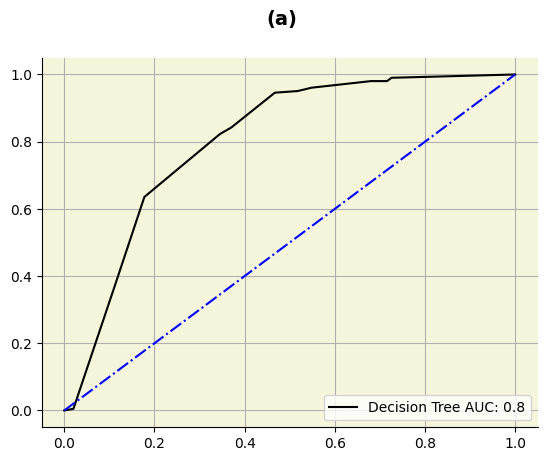

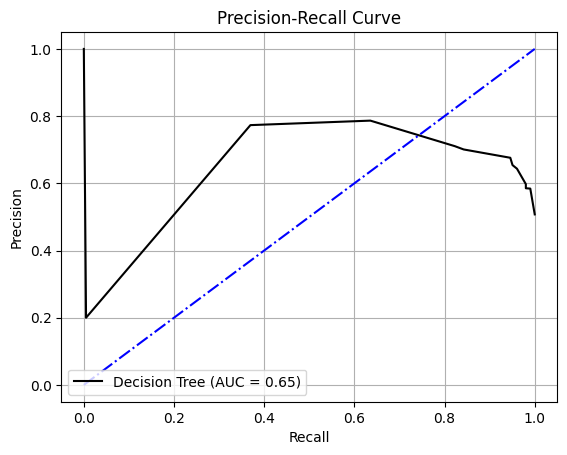

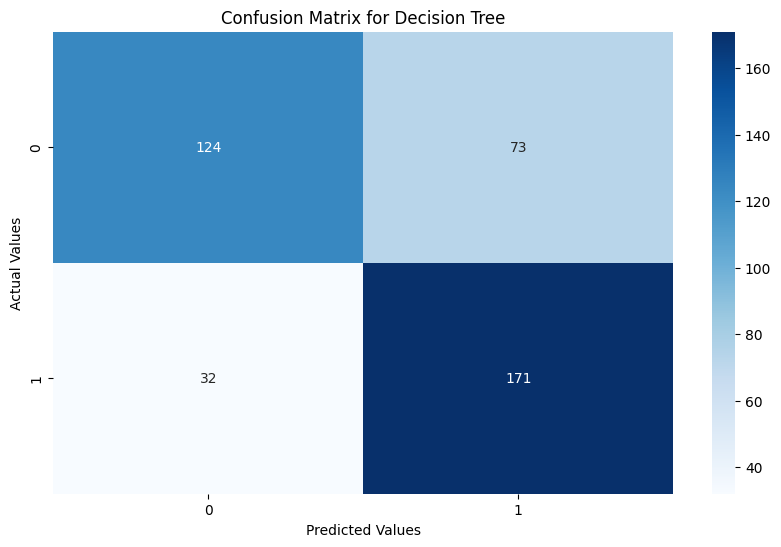

In [ ]:
# y_pred = dtClassifier.predict(x_test)
# y_proba = dtClassifier.predict_proba(x_test)[:,1]

# print(confusion_matrix(y_test, y_pred))
# print(classification_report(y_test, y_pred))


# print("hamming loss")
# print(hamming_loss(y_test, y_pred))
# print("jaccord score")
# print(jaccard_score(y_test, y_pred))
# print("log loss")
# print(log_loss(y_test,y_pred))
# print("mathews correlation coefficient")
# print(matthews_corrcoef(y_test, y_pred))

# print('\n')
# accuracy = round(accuracy_score(y_test, y_pred),2)
# print("accuracy",accuracy)
# precision = round(precision_score(y_test, y_pred),2)
# print("precision",precision)
# recall = round(recall_score(y_test, y_pred),2)
# print("recall",recall)
# precision_recall = round(average_precision_score(y_test, y_proba),2)
# auc = round(roc_auc_score(y_test, y_proba),2)
# print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
# print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

# fpr, tpr, _ = roc_curve(y_test,  y_proba)
# auc = round(roc_auc_score(y_test, y_proba),2)


# fig = plt.figure()

# # Set titles for the figure and the subplot respectively
# fig.suptitle('(a)', fontsize=14, fontweight='bold')
# ax = plt.axes()
# ax.set_facecolor('beige')

# plt.plot(fpr,tpr,color='xkcd:black',label='Decision tree  AUC: '+str(auc))
# plt.legend(loc=4)
# plt.grid(True)
# plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.savefig("AUC Decision Tree", dpi=800,bbox_inches = 'tight')

# plt.show()




# #Precision Recall Curve
# from sklearn.metrics import precision_recall_curve
# from sklearn.utils import Bunch
# from sklearn.metrics import PrecisionRecallDisplay
# from sklearn.metrics import auc

# # Calculate precision and recall
# y_scores = dtClassifier.predict_proba(x_test)[:, 1]
# precision, recall, _ = precision_recall_curve(y_test, y_scores)

# # Compute area under the curve (AUC)
# auc_score = auc(recall, precision)

# # Plot precision-recall curve
# plt.figure()
# plt.plot(recall, precision, color='black', label=f'Decisiontree (AUC = {auc_score:.2f})')

# # Customize the plot
# plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Precision-Recall Curve')
# plt.legend(loc='lower left')
# plt.grid(True)

# # Save the plot
# plt.savefig("PR_curve_decisiontree.png", dpi=800, bbox_inches='tight')
# plt.show()


# #Confusion Matrix
#  #print confusion matrix
# cm=confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(10,6))
# sns.heatmap(cm,annot=True,fmt="d")
# sns.heatmap
# plt.xlabel('Actual values')
# plt.ylabel('Predicted values')
# plt.savefig("Confusion Matix Decision Tree", dpi=800,bbox_inches = 'tight')
y_pred = dt_classifier.predict(x_test)
y_proba = dt_classifier.predict_proba(x_test)[:, 1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

print("hamming loss")
print(hamming_loss(y_test, y_pred))
print("jaccord score")
print(jaccard_score(y_test, y_pred))
print("log loss")
print(log_loss(y_test, y_proba))  # Fix: log_loss requires probabilities, not binary predictions
print("mathews correlation coefficient")
print(matthews_corrcoef(y_test, y_pred))

print('\n')
accuracy = round(accuracy_score(y_test, y_pred), 2)
print("accuracy", accuracy)
precision = round(precision_score(y_test, y_pred), 2)
print("precision", precision)
recall = round(recall_score(y_test, y_pred), 2)
print("recall", recall)
precision_recall = round(average_precision_score(y_test, y_proba), 2)
auc = round(roc_auc_score(y_test, y_proba), 2)
print('AUC: {}'.format(auc))
print('Precision-Recall: {}'.format(precision_recall))

fpr, tpr, _ = roc_curve(y_test, y_proba)
auc = round(roc_auc_score(y_test, y_proba), 2)

fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr, tpr, color='xkcd:black', label='Decision Tree AUC: ' + str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC_Decision_Tree.png", dpi=800, bbox_inches='tight')

plt.show()

# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.utils import Bunch
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import auc

# Calculate precision and recall
y_scores = dt_classifier.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC)
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='black', label=f'Decision Tree (AUC = {auc_score:.2f})')

# Customize the plot
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)

# Save the plot
plt.savefig("PR_curve_decision_tree.png", dpi=800, bbox_inches='tight')
plt.show()

# Confusion Matrix
# Print confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')  # Added cmap for better visuals
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title("Confusion Matrix for Decision Tree")
plt.savefig("Confusion_Matrix_Decision_Tree.png", dpi=800, bbox_inches='tight')
plt.show()


In [ ]:
# Create a based model
knn = KNeighborsClassifier(algorithm = 'brute')

k_range = list(range(1, 100))
param_grid = dict(n_neighbors=k_range)

# Instantiate the grid search model
knnClassifier = BayesSearchCV(
    knn,
    param_grid,
    n_iter=30,  # Number of iterations/evaluations
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)

knnClassifier.fit(x_train, y_train)
knnClassifier.best_params_

OrderedDict([('n_neighbors', 51)])

[[112  85]
 [ 28 175]]
              precision    recall  f1-score   support

         0.0       0.80      0.57      0.66       197
         1.0       0.67      0.86      0.76       203

    accuracy                           0.72       400
   macro avg       0.74      0.72      0.71       400
weighted avg       0.74      0.72      0.71       400

hamming loss
0.2825
jaccord score
0.6076388888888888
log loss
10.182332082425596
mathews correlation coefficient
0.4513374005227855


accuracy 0.72
precision 0.67
recall 0.86
AUC: 0.8
Precision-Recall: 0.75


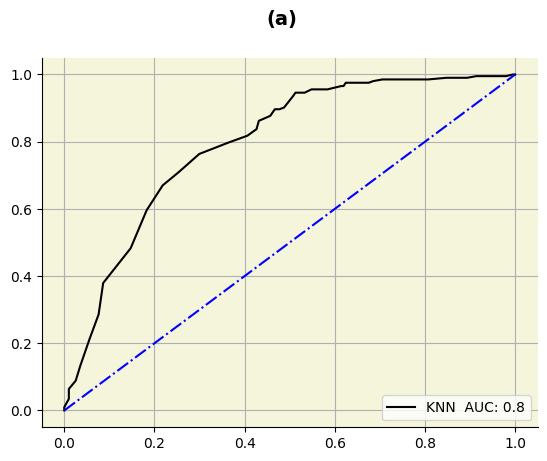

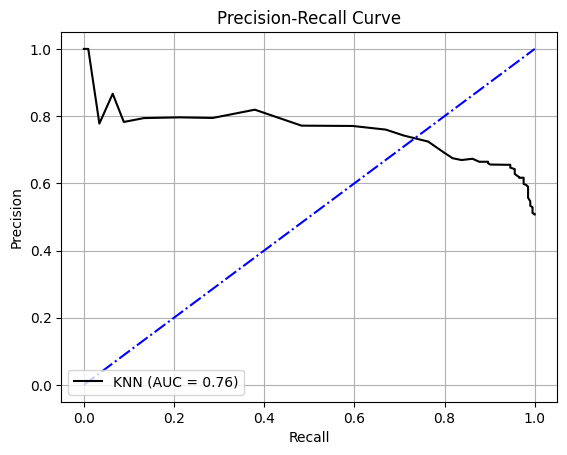

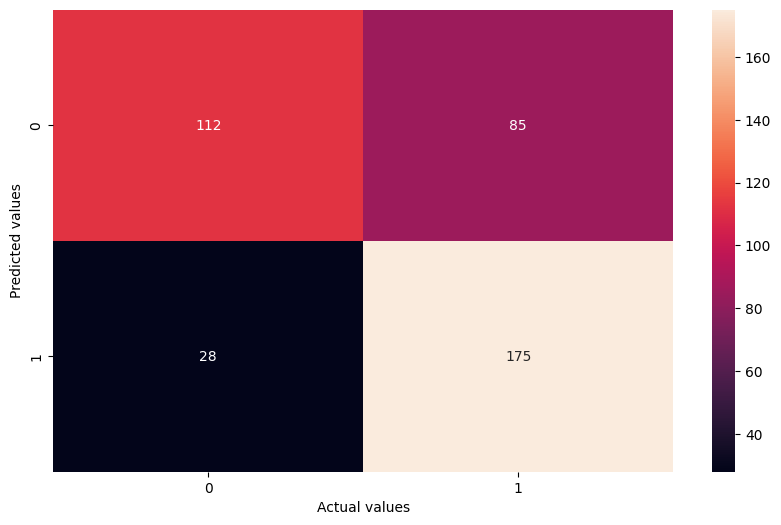

In [ ]:
y_pred = knnClassifier.predict(x_test)
y_proba = knnClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print("hamming loss")
print(hamming_loss(y_test, y_pred))
print("jaccord score")
print(jaccard_score(y_test, y_pred))
print("log loss")
print(log_loss(y_test,y_pred))
print("mathews correlation coefficient")
print(matthews_corrcoef(y_test, y_pred))


print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(a)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='KNN  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC KNN", dpi=800,bbox_inches = 'tight')

plt.show()




#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.utils import Bunch
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import auc

# Calculate precision and recall
y_scores = knnClassifier.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC)
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='black', label=f'KNN (AUC = {auc_score:.2f})')

# Customize the plot
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)

# Save the plot
plt.savefig("PR KNN.png", dpi=800, bbox_inches='tight')
plt.show()



#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix KNN", dpi=800,bbox_inches = 'tight')



In [ ]:
!pip install catboost


In [ ]:
from catboost import CatBoostClassifier

param_grid = {'depth':[3,1,2],
          'iterations':[100],
          'learning_rate':[0.03],
          'l2_leaf_reg':[3,1,5,10],
          'border_count':[32,5,10],

             }

# Create a based model
cd = CatBoostClassifier()
# Instantiate the grid search model
grid_searchCatBoostClassifier = BayesSearchCV(
    cd,
    param_grid,
    n_iter=30,  # Number of iterations/evaluations
    cv=5,  # Number of cross-validation folds
    n_jobs=-1,  # Use all available CPU cores
    random_state=42
)


grid_searchCatBoostClassifier.fit(x_train, y_train)
grid_searchCatBoostClassifier.best_params_


0:	learn: 0.6831612	total: 1.54ms	remaining: 153ms
1:	learn: 0.6745221	total: 2.93ms	remaining: 143ms
2:	learn: 0.6658229	total: 4.24ms	remaining: 137ms
3:	learn: 0.6584665	total: 5.17ms	remaining: 124ms
4:	learn: 0.6508640	total: 6.05ms	remaining: 115ms
5:	learn: 0.6440622	total: 7.01ms	remaining: 110ms
6:	learn: 0.6369912	total: 8.03ms	remaining: 107ms
7:	learn: 0.6309634	total: 8.93ms	remaining: 103ms
8:	learn: 0.6256873	total: 9.9ms	remaining: 100ms
9:	learn: 0.6190351	total: 10.8ms	remaining: 97.1ms
10:	learn: 0.6136975	total: 11.7ms	remaining: 95ms
11:	learn: 0.6080968	total: 12.9ms	remaining: 94.3ms
12:	learn: 0.6026600	total: 13.9ms	remaining: 93ms
13:	learn: 0.5991988	total: 14.9ms	remaining: 91.6ms
14:	learn: 0.5950959	total: 16ms	remaining: 90.7ms
15:	learn: 0.5913548	total: 17ms	remaining: 89.4ms
16:	learn: 0.5875378	total: 18.1ms	remaining: 88.1ms
17:	learn: 0.5840341	total: 19.2ms	remaining: 87.3ms
18:	learn: 0.5807143	total: 20.3ms	remaining: 86.4ms
19:	learn: 0.5776725	

OrderedDict([('border_count', 5),
             ('depth', 3),
             ('iterations', 100),
             ('l2_leaf_reg', 10),
             ('learning_rate', 0.03)])

[[115  82]
 [ 23 180]]
              precision    recall  f1-score   support

         0.0       0.83      0.58      0.69       197
         1.0       0.69      0.89      0.77       203

    accuracy                           0.74       400
   macro avg       0.76      0.74      0.73       400
weighted avg       0.76      0.74      0.73       400

hamming loss
0.2625
jaccord score
0.631578947368421
log loss
9.461459014643252
mathews correlation coefficient
0.49477735977955073


accuracy 0.74
precision 0.69
recall 0.89
AUC: 0.83
Precision-Recall: 0.81


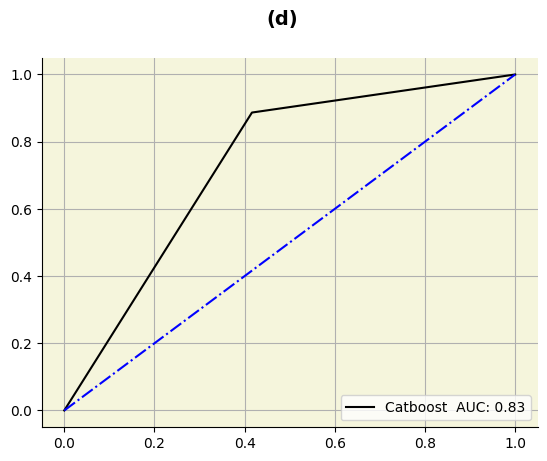

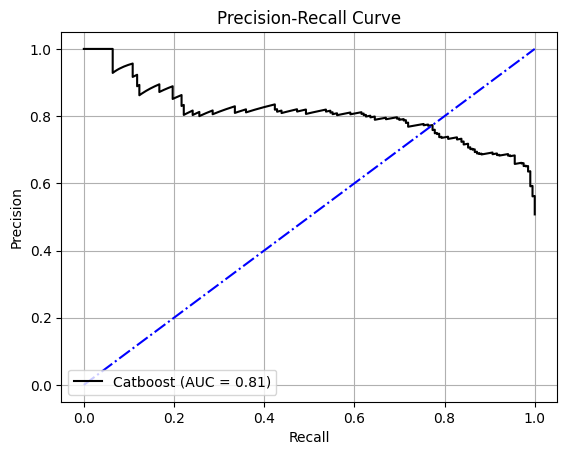

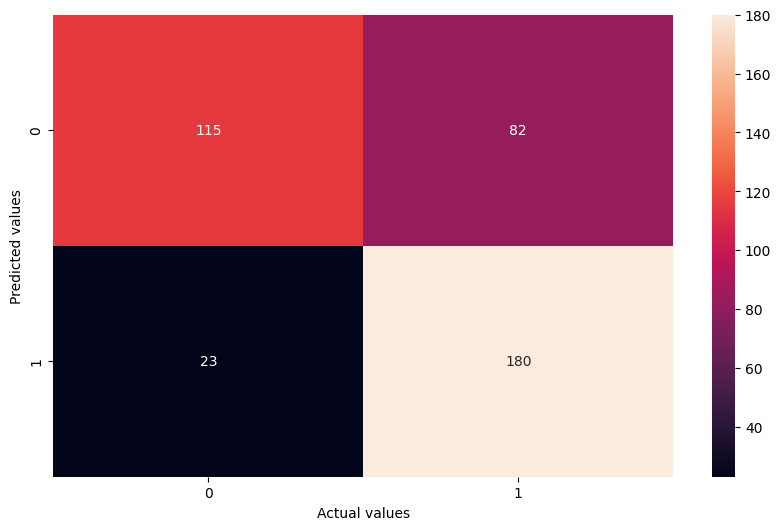

In [ ]:
y_pred = grid_searchCatBoostClassifier.predict(x_test)
y_proba = grid_searchCatBoostClassifier.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print("hamming loss")
print(hamming_loss(y_test, y_pred))
print("jaccord score")
print(jaccard_score(y_test, y_pred))
print("log loss")
print(log_loss(y_test,y_pred))
print("mathews correlation coefficient")
print(matthews_corrcoef(y_test, y_pred))

# ExtratreeClassifier summary
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))

fpr, tpr, _ = roc_curve(y_test,  y_pred)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
fig.suptitle('(d)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Catboost  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Catboost", dpi=800,bbox_inches = 'tight')

plt.show()




#Precision Recall Curve
from sklearn.metrics import precision_recall_curve
from sklearn.utils import Bunch
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import auc

# Calculate precision and recall
y_scores = grid_searchCatBoostClassifier.predict_proba(x_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC)
auc_score = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='black', label=f'Catboost (AUC = {auc_score:.2f})')

# Customize the plot
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)

# Save the plot
plt.savefig("PR curve Catboost.png", dpi=800, bbox_inches='tight')
plt.show()

#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion Matix Catboost", dpi=800,bbox_inches = 'tight')


In [ ]:
from sklearn.model_selection import cross_val_predict, cross_val_score, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import accuracy_score

# Assuming x_train, y_train, x_test, y_test are defined

# Define your classifiers
grid_searchCatBoostClassifier = CatBoostClassifier()  # Update this with your CatBoost classifier
dt_classifier = dt_classifier  # Use the best estimator from GridSearchCV
knnClassifier = knnClassifier  # Use the best estimator from GridSearchCV

# Step 1: Define Base Classifiers
base_classifiers = [
    ('rf', RandomForestClassifier()),
    ('lr', LogisticRegression()),
    ('knn', KNeighborsClassifier()),
    ('catboost', grid_searchCatBoostClassifier),
    ('dt', dt_classifier),
    ('knn2', knnClassifier)
]
# Step 2: Define Meta-Classifier
meta_classifier = LogisticRegression()

# Step 3: Implement Cross-Validation
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
stacked_clf = StackingClassifier(estimators=base_classifiers, final_estimator=meta_classifier)

# Perform cross-validation
cv_scores = cross_val_score(stacked_clf, x_train, y_train, cv=cv, scoring='accuracy')

# Step 4: Evaluate Performance
print("Cross-Validation Mean Accuracy:", cv_scores.mean())

# Fit the stacked classifier on the entire training set
stacked_clf.fit(x_train, y_train)

# Make predictions on the test set
predictions = stacked_clf.predict(x_test)

# Evaluate the performance of the stacked classifier on the test set
test_accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", test_accuracy)

Streaming output truncated to the last 5000 lines.
92:	learn: 0.5222204	total: 539ms	remaining: 5.25s
93:	learn: 0.5214705	total: 546ms	remaining: 5.26s
94:	learn: 0.5208236	total: 560ms	remaining: 5.33s
95:	learn: 0.5201342	total: 576ms	remaining: 5.42s
96:	learn: 0.5193670	total: 582ms	remaining: 5.42s
97:	learn: 0.5182414	total: 586ms	remaining: 5.39s
98:	learn: 0.5171070	total: 597ms	remaining: 5.43s
99:	learn: 0.5164309	total: 602ms	remaining: 5.41s
100:	learn: 0.5154847	total: 607ms	remaining: 5.4s
101:	learn: 0.5144730	total: 612ms	remaining: 5.39s
102:	learn: 0.5138754	total: 617ms	remaining: 5.38s
103:	learn: 0.5134483	total: 622ms	remaining: 5.36s
104:	learn: 0.5126907	total: 629ms	remaining: 5.36s
105:	learn: 0.5117769	total: 636ms	remaining: 5.36s
106:	learn: 0.5109566	total: 645ms	remaining: 5.38s
107:	learn: 0.5102775	total: 649ms	remaining: 5.36s
108:	learn: 0.5096682	total: 657ms	remaining: 5.37s
109:	learn: 0.5089923	total: 663ms	remaining: 5.37s
110:	learn: 0.5082476	

In [ ]:
#Stacking
# Three models
from mlxtend.classifier import StackingClassifier
clf1 = rfclassifier
clf2 = lrClassifier
clf3 = grid_searchCatBoostClassifier
clf4 = dt_classifier
clf5 = knnClassifier




# meta-classifier
meta_clf = LogisticRegression(random_state=42,max_iter=9000)

# Stacking
stack = StackingClassifier(classifiers=[clf1, clf2, clf3, clf4,clf5],
                           use_probas=True,
                           average_probas=False,
                          meta_classifier=meta_clf)


Learning rate set to 0.012592
0:	learn: 0.6888054	total: 9.15ms	remaining: 9.14s
1:	learn: 0.6842887	total: 20.2ms	remaining: 10.1s
2:	learn: 0.6799103	total: 25.1ms	remaining: 8.34s
3:	learn: 0.6759531	total: 30.1ms	remaining: 7.48s
4:	learn: 0.6714582	total: 33.1ms	remaining: 6.58s
5:	learn: 0.6673167	total: 35.9ms	remaining: 5.94s
6:	learn: 0.6634853	total: 38.6ms	remaining: 5.48s
7:	learn: 0.6593695	total: 41.6ms	remaining: 5.16s
8:	learn: 0.6560098	total: 44.4ms	remaining: 4.89s
9:	learn: 0.6528999	total: 47.3ms	remaining: 4.69s
10:	learn: 0.6493270	total: 50ms	remaining: 4.5s
11:	learn: 0.6458388	total: 53ms	remaining: 4.37s
12:	learn: 0.6420327	total: 56ms	remaining: 4.25s
13:	learn: 0.6388272	total: 58.7ms	remaining: 4.13s
14:	learn: 0.6351242	total: 61.5ms	remaining: 4.04s
15:	learn: 0.6316814	total: 64.3ms	remaining: 3.96s
16:	learn: 0.6292533	total: 73.8ms	remaining: 4.26s
17:	learn: 0.6260984	total: 76.5ms	remaining: 4.17s
18:	learn: 0.6232605	total: 79.1ms	remaining: 4.08s

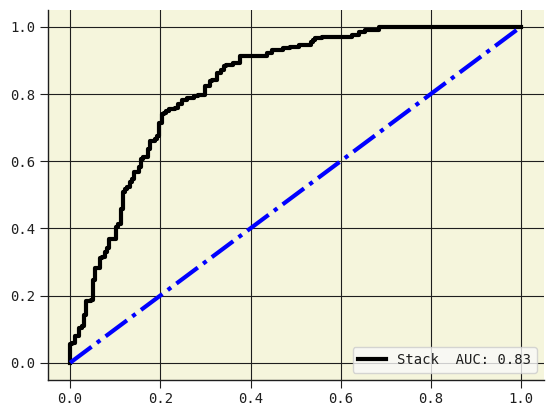

In [ ]:
stack.fit(x_train, y_train)
y_pred = stack.predict(x_test)
y_proba = stack.predict_proba(x_test)[:,1]

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


print("hamming loss")
print(hamming_loss(y_test, y_pred))
print("jaccord score")
print(jaccard_score(y_test, y_pred))
print("log loss")
print(log_loss(y_test,y_pred))
print("mathews correlation coefficient")
print(matthews_corrcoef(y_test, y_pred))

# StackingClassifier summary
print('\n')
accuracy = round(accuracy_score(y_test, y_pred),2)
print("accuracy",accuracy)
precision = round(precision_score(y_test, y_pred),2)
print("precision",precision)
recall = round(recall_score(y_test, y_pred),2)
print("recall",recall)
precision_recall = round(average_precision_score(y_test, y_proba),2)
auc = round(roc_auc_score(y_test, y_proba),2)
print('AUC: {}'.format(round(roc_auc_score(y_test, y_proba),2)))
print('Precision-Recall: {}'.format(round(average_precision_score(y_test, y_proba),2)))


fpr, tpr, _ = roc_curve(y_test,  y_proba)
auc = round(roc_auc_score(y_test, y_proba),2)


fig = plt.figure()

# Set titles for the figure and the subplot respectively
#fig.suptitle('(h)', fontsize=14, fontweight='bold')
ax = plt.axes()
ax.set_facecolor('beige')

plt.plot(fpr,tpr,color='xkcd:black',label='Stack  AUC: '+str(auc))
plt.legend(loc=4)
plt.grid(True)
plt.plot([0, 1], [0, 1], color='blue', linestyle='-.')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.savefig("AUC Stack", dpi=800,bbox_inches = 'tight')

plt.show()







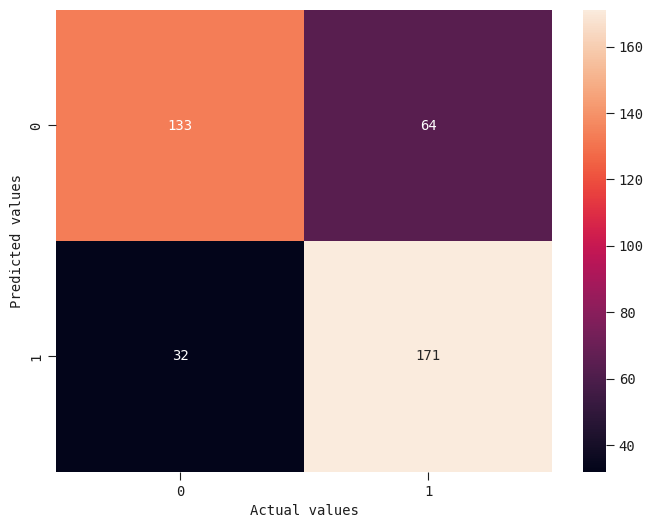

In [ ]:
#Confusion Matrix
 #print confusion matrix
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm,annot=True,fmt="d")
sns.heatmap
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.savefig("Confusion matrix StackB", dpi=800,bbox_inches = 'tight')

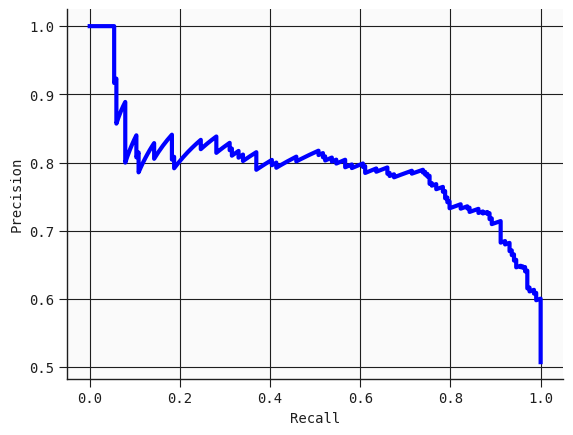

In [ ]:
from sklearn.metrics import precision_recall_curve
precision,recall,thresholds=precision_recall_curve(y_test,y_proba)
fig, ax=plt.subplots()
ax.plot(recall,precision,color='blue')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.grid(True)
plt.savefig("PR Final", dpi=800,bbox_inches = 'tight')
plt.show()

In [ ]:
!pip install --upgrade lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=95a261cecbbfbf4b6c0abcf4720cc99dea319872f476478b4bfc90655089381b
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
from lime import lime_tabular

interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(x_train),
    feature_names=list(x_train.columns),
    mode='classification'
)

In [ ]:
x_test.iloc[25]

age                    0.823529
height(cm)             0.763158
weight(kg)             0.370370
waist(cm)              0.627907
eyesight(left)         0.090909
eyesight(right)        0.090909
hearing(left)          0.500000
hearing(right)         0.500000
systolic               0.545064
relaxation             0.493151
fasting blood sugar    0.304965
Cholesterol            0.391011
triglyceride           0.171171
HDL                    0.144847
LDL                    0.046774
hemoglobin             0.582938
Urine protein          0.166667
serum creatinine       0.051724
AST                    0.020183
ALT                    0.005148
Gtp                    0.030030
dental caries          0.000000
Name: 375, dtype: float64

In [ ]:
exp = interpretor.explain_instance(
data_row= x_test.iloc[0],
predict_fn= rfclassifier.predict_proba
)

In [ ]:
exp.save_to_file('LIME1.html')

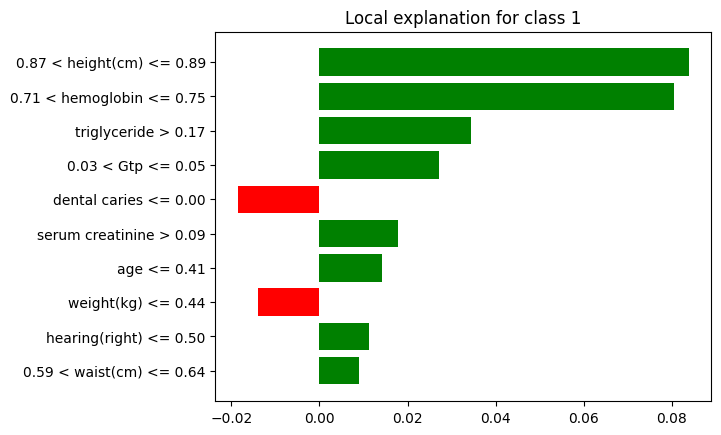

In [ ]:
fig = exp.as_pyplot_figure()
fig.savefig('lime_report.png')

fig=exp.show_in_notebook(show_table=True)
plt.savefig("LIMESurvived.png", dpi=100,bbox_inches = 'tight')
plt.show()

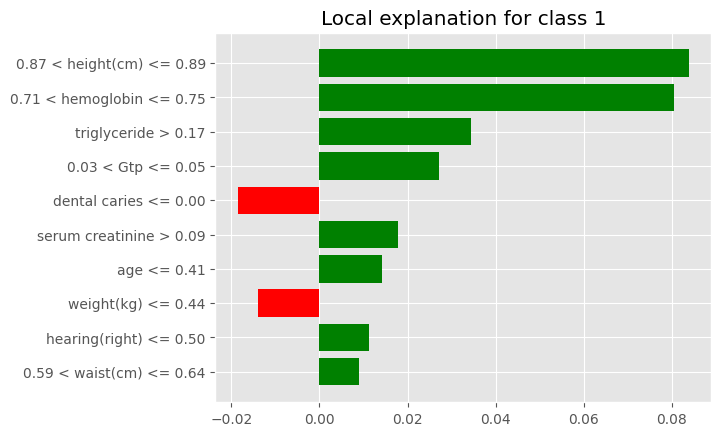

In [ ]:
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()

    plt.savefig("LIME1.png", dpi=600,bbox_inches = 'tight')

In [ ]:
exp = interpretor.explain_instance(

                                   data_row=x_test.iloc[25], ##new data
    predict_fn=rfclassifier.predict_proba
)

fig=exp.show_in_notebook(show_table=True)

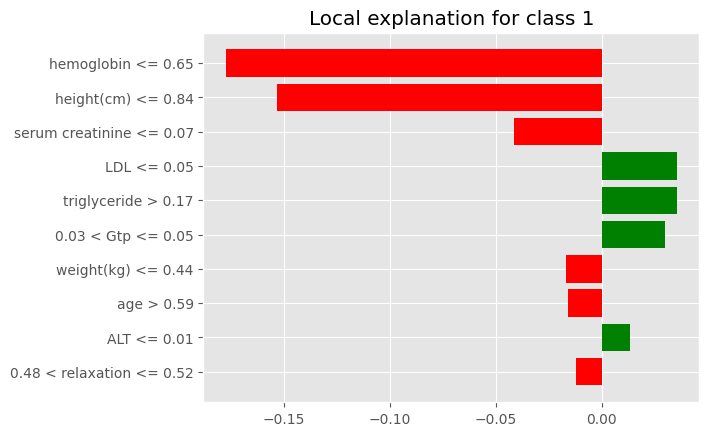

In [ ]:
with plt.style.context("ggplot"):
    exp.as_pyplot_figure()
    plt.savefig("LIME2.png", dpi=600,bbox_inches = 'tight')

In [ ]:
!pip install feyn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 326.2/326.2 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 23.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 4.8 MB/s eta 0:00:00


In [ ]:
import feyn

# Create a new QLattice object
ql = feyn.QLattice()

# Instantiate a new QLattice object to reset it
ql = feyn.QLattice(random_seed=42)

# Assuming 'df' is your dataframe
fig = ql.auto_run(df, output_name="smoking", kind="classification", max_complexity=5)

In [ ]:
import feyn

In [ ]:
ql = feyn.connect_qlattice()
ql.reset(random_seed=42)
fig = ql.auto_run(df, output_name="smoking", kind="classification", max_complexity=5)

In [ ]:
ql = feyn.QLattice(random_seed=42)

# Run the auto_run function on the dataframe
models = ql.auto_run(df, output_name="smoking", kind="classification", max_complexity=5)

# Check if models were returned
if models:
    # Select the best model (e.g., the first one)
    best_model = models[0]

    # Show the figure
    plt.show()


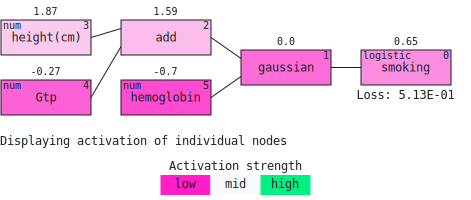

In [ ]:
from IPython.display import display, SVG

if models:
    # Select the best model (e.g., the first one)
    best_model = models[0]

    # Select a sample from the DataFrame (e.g., the first row)
    sample = df.iloc[0:1]  # Ensure sample is a DataFrame, even if it's a single row

    # Plot the QLattice flow
    svg = best_model.plot_flow(data=df, sample=sample)

    # Display the SVG
    display(SVG(svg.data))


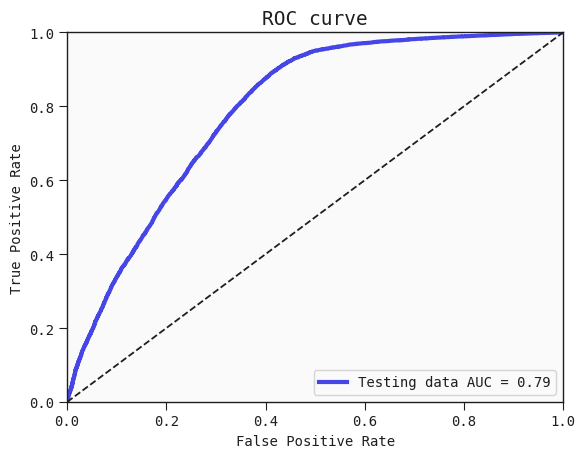

In [ ]:
fig[0].plot_roc_curve(df, label="Testing data")

In [ ]:
fig[0].sympify(2)

logreg(0.65 - 5.2*exp(-26.0*(0.54 - hemoglobin)**2 - 83.0*(Gtp + 0.91*height(cm) - 0.73)**2))

In [ ]:
!pip install anchor
!pip install anchor-exp



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.3/126.3 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Using cached pbr-6.1.0-py2.py3-none-any.whl.metadata (3.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 432.2/432.2 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.8/131.8 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.3/202.3 kB 15.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 146.1/146.1 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.1/43.1 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.4/115.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.3/289.3

In [ ]:
import importlib
from anchor.anchor_tabular import AnchorTabularExplainer

# Import the module you want to reload
import anchor.anchor_tabular as anchor_tabular

# Reload the module
importlib.reload(anchor_tabular)

# Now, import the required class after reloading
from anchor.anchor_tabular import AnchorTabularExplainer


In [ ]:
df.dtypes

age                    float64
height(cm)             float64
weight(kg)             float64
waist(cm)              float64
eyesight(left)         float64
eyesight(right)        float64
hearing(left)          float64
hearing(right)         float64
systolic               float64
relaxation             float64
fasting blood sugar    float64
Cholesterol            float64
triglyceride           float64
HDL                    float64
LDL                    float64
hemoglobin             float64
Urine protein          float64
serum creatinine       float64
AST                    float64
ALT                    float64
Gtp                    float64
dental caries          float64
smoking                float64
dtype: object

In [ ]:
index_not_smoker=np.where(y_test.values==0)[0]
index_not_smoker

array([  1,   2,   3,   4,   6,   7,  10,  14,  15,  16,  17,  19,  23,
        24,  25,  29,  34,  36,  37,  39,  40,  43,  45,  49,  52,  53,
        54,  55,  56,  59,  61,  63,  65,  67,  71,  72,  73,  74,  76,
        77,  84,  88,  89,  91,  93,  96, 106, 108, 109, 110, 113, 116,
       118, 119, 120, 124, 126, 129, 130, 133, 135, 137, 139, 140, 141,
       143, 147, 148, 151, 152, 153, 157, 162, 164, 168, 169, 170, 172,
       173, 174, 176, 180, 181, 185, 186, 189, 191, 194, 197, 200, 201,
       202, 204, 208, 210, 211, 212, 216, 217, 218, 219, 220, 223, 225,
       227, 228, 232, 233, 234, 235, 238, 240, 241, 243, 245, 246, 248,
       249, 252, 255, 256, 258, 260, 261, 262, 263, 264, 266, 269, 270,
       271, 272, 274, 276, 277, 281, 282, 283, 284, 285, 287, 289, 290,
       291, 293, 294, 296, 297, 298, 299, 303, 304, 306, 308, 309, 314,
       315, 316, 317, 318, 323, 325, 326, 330, 331, 332, 333, 334, 335,
       337, 339, 343, 346, 350, 353, 356, 357, 358, 360, 362, 36

In [ ]:
index_smoker=np.where(y_test.values==1)[0]
index_smoker

array([  0,   5,   8,   9,  11,  12,  13,  18,  20,  21,  22,  26,  27,
        28,  30,  31,  32,  33,  35,  38,  41,  42,  44,  46,  47,  48,
        50,  51,  57,  58,  60,  62,  64,  66,  68,  69,  70,  75,  78,
        79,  80,  81,  82,  83,  85,  86,  87,  90,  92,  94,  95,  97,
        98,  99, 100, 101, 102, 103, 104, 105, 107, 111, 112, 114, 115,
       117, 121, 122, 123, 125, 127, 128, 131, 132, 134, 136, 138, 142,
       144, 145, 146, 149, 150, 154, 155, 156, 158, 159, 160, 161, 163,
       165, 166, 167, 171, 175, 177, 178, 179, 182, 183, 184, 187, 188,
       190, 192, 193, 195, 196, 198, 199, 203, 205, 206, 207, 209, 213,
       214, 215, 221, 222, 224, 226, 229, 230, 231, 236, 237, 239, 242,
       244, 247, 250, 251, 253, 254, 257, 259, 265, 267, 268, 273, 275,
       278, 279, 280, 286, 288, 292, 295, 300, 301, 302, 305, 307, 310,
       311, 312, 313, 319, 320, 321, 322, 324, 327, 328, 329, 336, 338,
       340, 341, 342, 344, 345, 347, 348, 349, 351, 352, 354, 35

In [ ]:
predict_fn=lambda x: stack.predict_proba(x)

In [ ]:
features_name=x_train.columns

In [ ]:
explainer=AnchorTabularExplainer([0,1],features_name, x_train.values)

In [ ]:

idx=index_not_smoker[9]
class_names=[0,1]
explanation=explainer.explain_instance(x_test.iloc[idx].values,stack.predict,threshold=0.95)

#print('Anchor: %s' % ('AND'.join(explanation.names(1))))
#print('Precision: %.2f' % explanation.precision(1))
#print('Coverage: %.2f' % explanation.coverage(1))

# Check if explanation is not empty
if explanation.names(1):
    print('Anchor: %s' % (' AND '.join(explanation.names(1))))
    print('Precision: %.2f' % explanation.precision(1))
    print('Coverage: %.2f' % explanation.coverage(1))
else:
    print("No valid explanation found.")

Anchor: LDL <= 0.06 AND height(cm) > 0.87
Precision: 0.75
Coverage: 0.25


In [ ]:
idx=index_not_smoker[10]
class_names=[0,1]
explanation=explainer.explain_instance(x_test.iloc[idx].values,stack.predict,threshold=0.95)
print('Anchor: %s' % ('AND'.join(explanation.names(1))))
print('Precision: %.2f' % explanation.precision(1))
print('Coverage: %.2f' % explanation.coverage(1))

Anchor: Gtp <= 0.02ANDhemoglobin <= 0.71
Precision: 0.79
Coverage: 0.21


In [ ]:

idx=index_not_smoker[11]
class_names=[0,1]
explanation=explainer.explain_instance(x_test.iloc[idx].values,stack.predict,threshold=0.95)
print('Anchor: %s' % ('AND'.join(explanation.names(1))))
print('Precision: %.2f' % explanation.precision(1))
print('Coverage: %.2f' % explanation.coverage(1))

Anchor: hemoglobin <= 0.65ANDheight(cm) <= 0.84
Precision: 0.93
Coverage: 0.20


In [ ]:

idx=index_not_smoker[12]
class_names=[0,1]
explanation=explainer.explain_instance(x_test.iloc[idx].values,stack.predict,threshold=0.95)
print('Anchor: %s' % ('AND'.join(explanation.names(1))))
print('Precision: %.2f' % explanation.precision(1))
print('Coverage: %.2f' % explanation.coverage(1))

Anchor: hemoglobin <= 0.65ANDweight(kg) <= 0.44
Precision: 0.83
Coverage: 0.19


In [ ]:

idx=index_not_smoker[13]
class_names=[0,1]
explanation=explainer.explain_instance(x_test.iloc[idx].values,stack.predict,threshold=0.95)
print('Anchor: %s' % ('AND'.join(explanation.names(1))))
print('Precision: %.2f' % explanation.precision(1))
print('Coverage: %.2f' % explanation.coverage(1))

Anchor: hemoglobin > 0.71ANDheight(cm) > 0.84
Precision: 0.71
Coverage: 0.43


In [ ]:


idx=index_smoker[0]
class_names=[0,1]
explanation=explainer.explain_instance(x_test.iloc[idx].values,stack.predict,threshold=0.95)
print('Anchor: %s' % ('AND'.join(explanation.names(1))))
print('Precision: %.2f' % explanation.precision(1))
print('Coverage: %.2f' % explanation.coverage(1))

Anchor: Gtp > 0.03ANDheight(cm) > 0.87
Precision: 0.79
Coverage: 0.29


In [ ]:
idx=index_smoker[1]
class_names=[0,1]
explanation=explainer.explain_instance(x_test.iloc[idx].values,stack.predict,threshold=0.95)
print('Anchor: %s' % ('AND'.join(explanation.names(1))))
print('Precision: %.2f' % explanation.precision(1))
print('Coverage: %.2f' % explanation.coverage(1))

Anchor: hemoglobin > 0.71ANDheight(cm) > 0.84
Precision: 0.71
Coverage: 0.43


In [ ]:
idx=index_smoker[2]
class_names=[0,1]
explanation=explainer.explain_instance(x_test.iloc[idx].values,stack.predict,threshold=0.95)
print('Anchor: %s' % ('AND'.join(explanation.names(1))))
print('Precision: %.2f' % explanation.precision(1))
print('Coverage: %.2f' % explanation.coverage(1))

Anchor: hemoglobin > 0.71ANDheight(cm) > 0.87
Precision: 0.71
Coverage: 0.33


In [ ]:
idx=index_smoker[3]
class_names=[0,1]
explanation=explainer.explain_instance(x_test.iloc[idx].values,stack.predict,threshold=0.95)
print('Anchor: %s' % ('AND'.join(explanation.names(1))))
print('Precision: %.2f' % explanation.precision(1))
print('Coverage: %.2f' % explanation.coverage(1))

Anchor: Gtp <= 0.03ANDtriglyceride <= 0.11
Precision: 0.70
Coverage: 0.35


In [ ]:
idx=index_smoker[4]
class_names=[0,1]
explanation=explainer.explain_instance(x_test.iloc[idx].values,stack.predict,threshold=0.95)
print('Anchor: %s' % ('AND'.join(explanation.names(1))))
print('Precision: %.2f' % explanation.precision(1))
print('Coverage: %.2f' % explanation.coverage(1))

Anchor: Gtp > 0.03ANDhemoglobin > 0.71
Precision: 0.76
Coverage: 0.31


In [ ]:
idx=index_smoker[5]
class_names=[0,1]
explanation=explainer.explain_instance(x_test.iloc[idx].values,stack.predict,threshold=0.95)
print('Anchor: %s' % ('AND'.join(explanation.names(1))))
print('Precision: %.2f' % explanation.precision(1))
print('Coverage: %.2f' % explanation.coverage(1))

Anchor: hemoglobin <= 0.71ANDheight(cm) <= 0.84
Precision: 0.87
Coverage: 0.30
